### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [28]:
data = pd.read_csv('Data.csv')
print('data: ')
data.head()
#
item = pd.read_csv('item.csv')
print('item: ')
item.head()
#
user = pd.read_csv('user.csv')
print('user: ')
user.head()

data: 


,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


item: 


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


user: 


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [60]:
print('1) For Data dataset \n')
print ('The information of the dataset is:')
data.info()
print ('The shape of the dataset is:',data.shape)
print ('The statistics of the dataset are:')
data.describe()  
data.isnull().values.any()
data.isna().values.any()
print('The number of missing value in the dataset Data.csv is ', max(data.isnull().sum().sum(),data.isna().sum().sum()))

1) For Data dataset 

The information of the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
The shape of the dataset is: (100000, 4)
The statistics of the dataset are:


,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


False

False

The number of missing value in the dataset Data.csv is  0


In [58]:
print('\n 2) For item dataset \n')
print ('The information of the dataset is:')
item.info()
print ('The shape of the dataset is:',item.shape) 
print ('The statistics of the dataset are:')
item.describe()
item.isnull().values.any()
item.isna().values.any()
print('The number of missing value in the dataset item.csv is ', max(item.isnull().sum().sum(),item.isna().sum().sum()))


 2) For item dataset 

The information of the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   i

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


False

False

The number of missing value in the dataset item.csv is  0


In [59]:
print('\n 3) For user dataset \n')
print ('The information of the dataset is:')
user.info()
print ('The shape of the dataset is:',user.shape) 
print ('The statistics of the dataset are:')
user.describe()
user.isnull().values.any()
user.isna().values.any()
print('The number of missing value in the dataset user.csv is ', max(user.isnull().sum().sum(),user.isna().sum().sum()))


 3) For user dataset 

The information of the dataset is:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
The shape of the dataset is: (943, 5)
The statistics of the dataset are:


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


False

False

The number of missing value in the dataset user.csv is  0


#### 4. Find the number of movies per genre using the item data - 5 marks

In [206]:
index=item.columns #extract the columns for genre only
index[3:] #extract the columns with genre only 
print('The number of movies per genre is: ')
item[index[3:]].sum(axis=0)

Index(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

The number of movies per genre is: 


unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [205]:
item2=item[item[index[3:]].sum(axis=1)>1]
print('The movies that have more than one genre are\n',item2['movie title'])

The movies that have more than one genre are
 0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [226]:
#search the movie where the genre is unknown
unknown_movie=item[item['unknown']==1]
unknown_movie
#create a new dataframe by dropping the movie where the genre is unknown
item3=item.drop(unknown_movie.index,axis=0)
item3.shape # check that 1 entrie was dropped in item3 (1681 entries in item data initially)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(1680, 22)

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [195]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


The rating distribution for all movies is: 



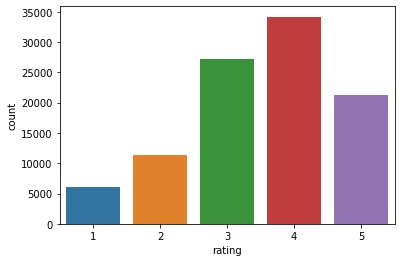

In [266]:
print('The rating distribution for all movies is: \n')
sns.countplot(x='rating', data=data)

The distribution of customer age is: 



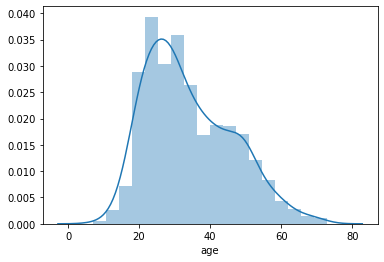

In [267]:
print('The distribution of customer age is: \n')
sns.distplot(user['age'])

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release year, Length: 1681, dtype: object
The number of unique year is: 71


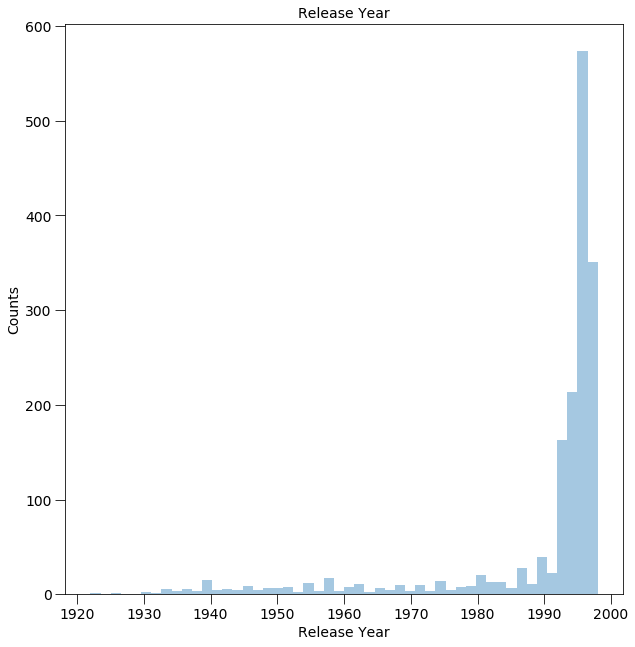

In [383]:
# Adding a new column to the existing item dataframe extracting realeas date only. 
item['release year']=item['release date'].str.split('-',expand=True)[2]
print(item['release year'])
# Estimate how many individal years need to be counted
print('The number of unique year is:', item['release year'].nunique())
# Plot the graph
fig,ax=plt.subplots();
fig.set_size_inches(10,10.5);
sns.distplot(item['release year'], kde=False)
ax.set_title("Release Year",fontsize=14);
ax.set_xlabel("Release Year",fontsize=14);
ax.set_ylabel("Counts",fontsize=14);
ax.tick_params(axis='both',length=10,labelsize=14);

The distribution of users per gender is: 



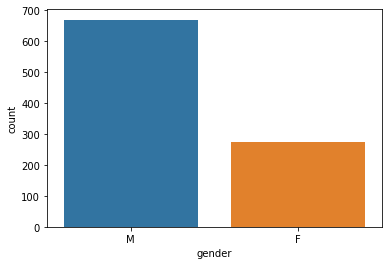

In [353]:
print('The distribution of users per gender is: \n')
sns.countplot(x='gender', data=user)

The number of unique occupation is: 21


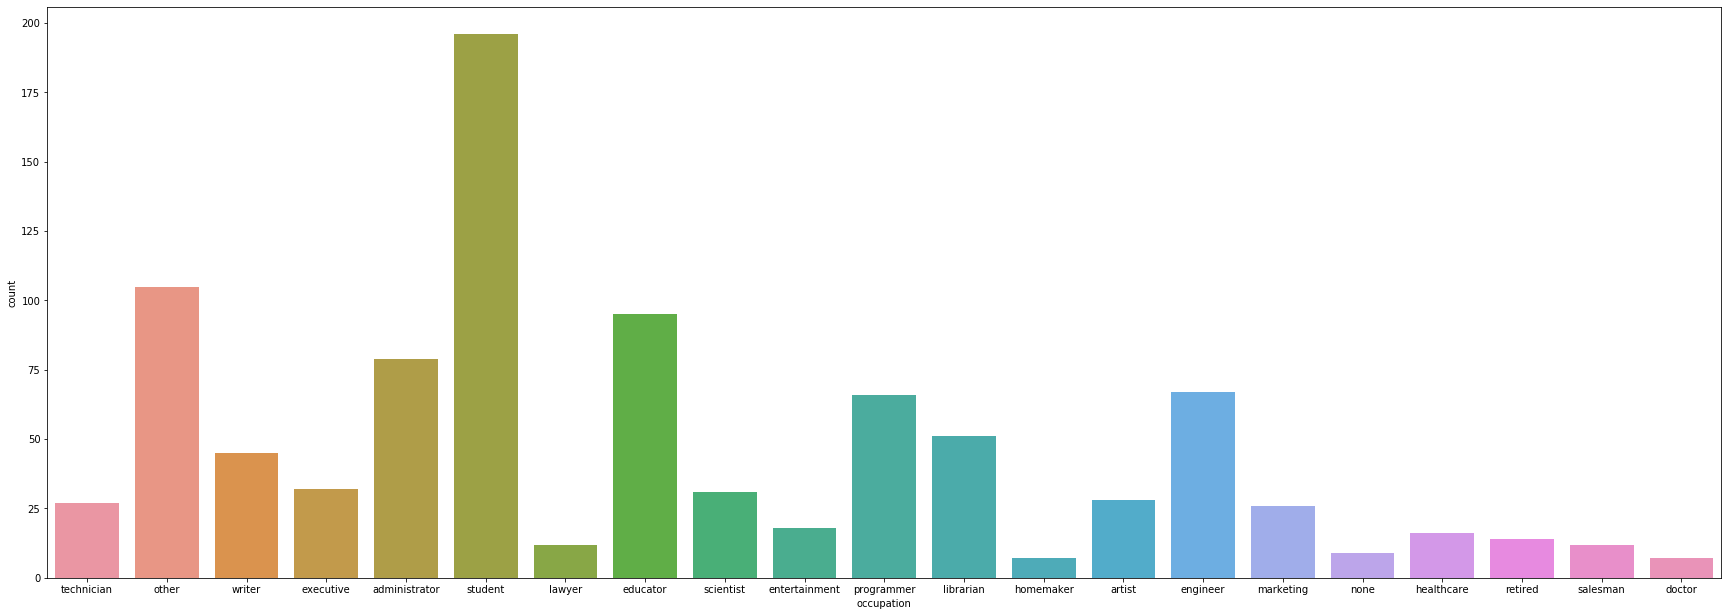

In [260]:
print('The number of unique occupation is:', user['occupation'].nunique())
sns.countplot(x='occupation', data=user)
fig=plt.gcf()
fig.set_size_inches(30,10.5)

The rating distribution is: 


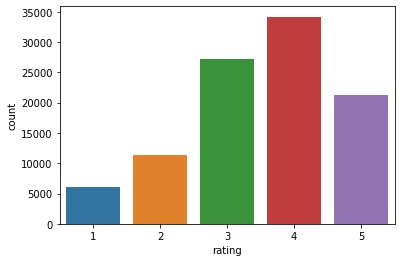

In [358]:
print('The rating distribution is: ')
sns.countplot(x='rating', data=data)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,,
1922,675,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,1542,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,617,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,656,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,189000,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995,183514,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996,322295,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


Action          46
Adventure       24
Animation        9
Childrens       22
Comedy         108
Crime           30
Documentary     18
Drama          170
Fantasy          6
Film-Noir        2
Horror          14
Musical          9
Mystery         18
Romance         51
Sci-Fi          15
Thriller        54
War             14
Western          6
dtype: int64

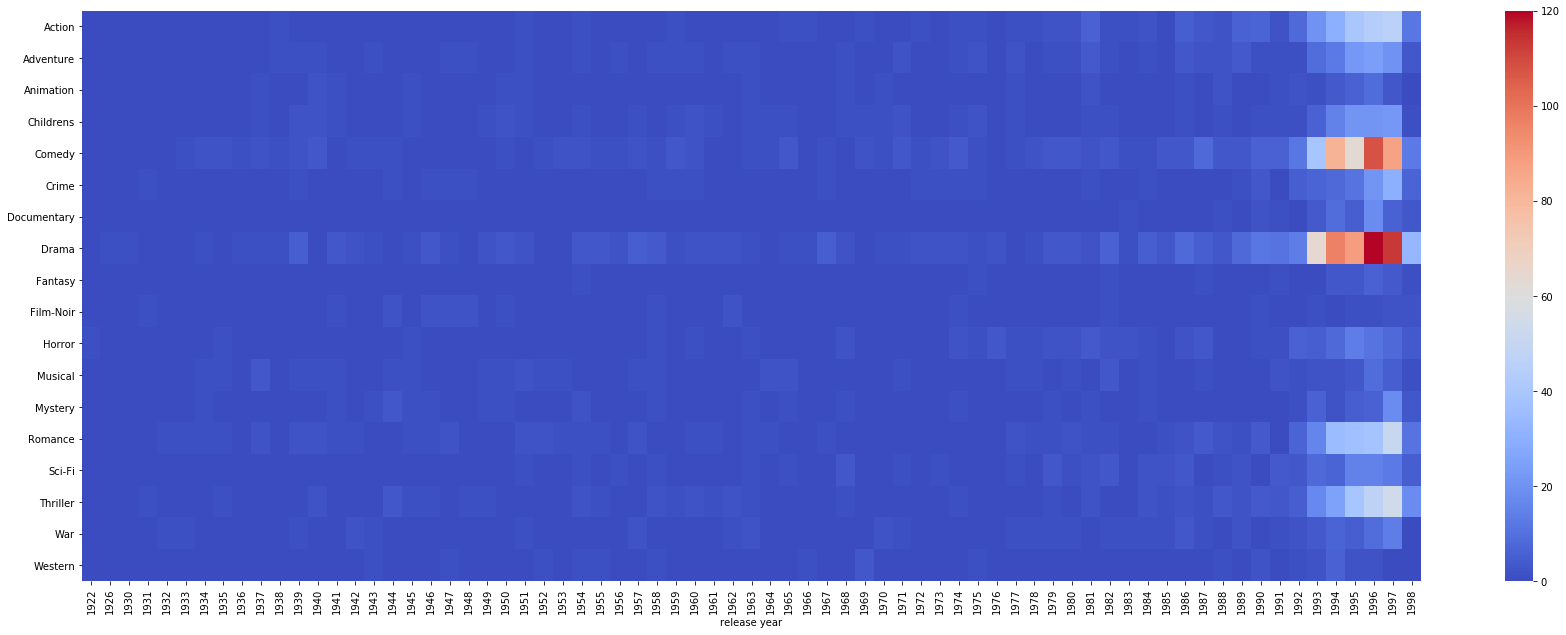

In [420]:
item.groupby(['release year']).sum()#create a dataframe grouped by release year with the sum for each genre
df_hmap=item.groupby(['release year']).sum().copy().drop(['movie id','unknown'], axis=1)#copy the dataframe and drop the not wanted columns
df_hmap.max()# find mqx value for a better scale
# plot the heatmap graph
fig=plt.gcf()
fig.set_size_inches(30,10.5)
sns.heatmap(df_hmap.transpose(),cmap='coolwarm',vmin=0,vmax=120)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [502]:
# Merge data and item dataframes to combine movie id and movie title
df_merged=pd.merge(data,item,how='outer',on='movie id')
df_merged.head()
#create a new database showing the number of ratings per movie title
df_count=df_merged.groupby(['movie title'])['rating'].count() 
df_count
#create a new database showing the rating average per movie title
df_average=df_merged.groupby(['movie title'])['rating'].mean()
df_average
# Merge df_average and df_count per movie title
df_merged2=pd.merge(df_count,df_average,how='outer',on='movie title')
#keep only movies with number of rating>100 and Extract the top 25 movies
df3=df_merged2[df_merged2['rating_x']>100]
print('\n The top 25 movies with number of ratings >100 are: \n')
df3.sort_values(by=['rating_y'], ascending=False).head(25)

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
1,63,242,3,875747190,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
2,226,242,5,883888671,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
3,154,242,3,879138235,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997
4,306,242,5,876503793,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997


movie title
'Til There Was You                   9
1-900                                5
101 Dalmatians                     109
12 Angry Men                       125
187                                 41
                                  ... 
Young Guns                         101
Young Guns II                       44
Young Poisoner's Handbook, The      41
Zeus and Roxanne                     6
Á köldum klaka (Cold Fever)          1
Name: rating, Length: 1658, dtype: int64

movie title
'Til There Was You                 2.333333
1-900                              2.600000
101 Dalmatians                     2.908257
12 Angry Men                       4.344000
187                                3.024390
                                     ...   
Young Guns                         3.207921
Young Guns II                      2.772727
Young Poisoner's Handbook, The     3.341463
Zeus and Roxanne                   2.166667
Á köldum klaka (Cold Fever)        3.000000
Name: rating, Length: 1658, dtype: float64


 The top 25 movies with number of ratings >100 are: 



,rating_x,rating_y
movie title,,
"Close Shave, A",112,4.491071
Schindler's List,298,4.466443
"Wrong Trousers, The",118,4.466102
Casablanca,243,4.456790
"Shawshank Redemption, The",283,4.445230
Rear Window,209,4.387560
"Usual Suspects, The",267,4.385768
Star Wars,583,4.358491
12 Angry Men,125,4.344000


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want to use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [546]:
# Merge df_merged and user per user id
df_merged3=pd.merge(df_merged,user,how='outer',on='user id')
df_merged3.head()
df_merged3.columns

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,release year,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1997,49,M,writer,55105
1,196,257,2,881251577,Men in Black,04-Jul-1997,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1997,49,M,writer,55105
2,196,111,4,881251793,"Truth About Cats & Dogs, The",26-Apr-1996,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1996,49,M,writer,55105
3,196,25,4,881251955,"Birdcage, The",08-Mar-1996,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1996,49,M,writer,55105
4,196,382,4,881251843,"Adventures of Priscilla, Queen of the Desert, ...",01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1994,49,M,writer,55105


Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'release year', 'age', 'gender',
       'occupation', 'zip code'],
      dtype='object')

In [580]:
# Count the number of number of ratings per genre
df_merged3.groupby(['gender']).count()['rating']
# Count the number of number of ratings for Drama per genre
df_merged3.groupby(['gender']).sum()['Drama']
# divide the number of ratings for Drama per genre with the total number of ratings per genre
perc_drama=df_merged3.groupby(['gender']).sum()['Drama'].div(df_merged3.groupby(['gender']).count()['rating'])*100
print('The percentage of women watching Drama is', perc_drama[0],'%')
print('The percentage of men watching Drama is', perc_drama[1],'%')

gender
F    25740
M    74260
Name: rating, dtype: int64

gender
F    11008.0
M    28887.0
Name: Drama, dtype: float64

The percentage of women watching Drama is 42.76612276612276 %
The percentage of men watching Drama is 38.89981147320226 %


In [582]:
perc_sf=df_merged3.groupby(['gender']).sum()['Sci-Fi'].div(df_merged3.groupby(['gender']).count()['rating'])*100
print('The percentage of women watching Sci-Fi is', perc_sf[0],'%')
print('The percentage of men watching Sci-Fi is', perc_sf[1],'%')

The percentage of women watching Sci-Fi is 10.213675213675213 %
The percentage of men watching Sci-Fi is 13.602208456773498 %


In [583]:
perc_rom=df_merged3.groupby(['gender']).sum()['Romance'].div(df_merged3.groupby(['gender']).count()['rating'])*100
print('The percentage of women watching Romance is', perc_rom[0],'%')
print('The percentage of men watching Romance is', perc_rom[1],'%')

The percentage of women watching Romance is 22.75835275835276 %
The percentage of men watching Romance is 18.31807164018314 %


Conclusions : 
All three statements are false:
* Women watch more drama than men
* Men watch more Sci-Fi than women
* Women watch more Romance than men